In [2]:
# !pip install matplotlib
!pip install seaborn

In [3]:
# Import Libraries
import numpy as np
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
happiness_df = pd.read_csv('../data/raw/happiness.csv')
costofliving_df = pd.read_csv('../data/raw/costofliving.csv')

In [5]:
happiness_df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000,1.370000e+02,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000,136.000000
mean,5.539796,0.064715,5.666526,5.412971,9.449796,0.799073,64.967632,0.787394,0.022431,0.725401,1.778000e+00,1.406985,1.156212,0.366176,0.540000,0.148474,0.145898,1.777838
std,1.139929,0.023031,1.117421,1.163724,1.207302,0.129222,5.750390,0.112371,0.141707,0.176956,2.897173e-15,0.432963,0.326322,0.156691,0.149501,0.076053,0.126723,0.504390
min,1.859000,0.029000,1.923000,1.795000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000,1.778000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.110000
25%,4.724000,0.047000,4.980000,4.496000,8.591000,0.722000,60.648500,0.724000,-0.074000,0.668000,1.778000e+00,1.099000,0.962000,0.248500,0.455000,0.097000,0.060000,1.555250
50%,5.684000,0.060000,5.797000,5.529000,9.567000,0.827000,65.837500,0.801000,0.001000,0.774000,1.778000e+00,1.449000,1.227000,0.389500,0.557000,0.137000,0.111000,1.848500
75%,6.334000,0.077000,6.441000,6.243000,10.540000,0.896000,69.412500,0.874000,0.117000,0.846000,1.778000e+00,1.798000,1.401000,0.487500,0.656000,0.199000,0.187000,2.078750
max,7.804000,0.147000,7.875000,7.733000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000,1.778000e+00,2.200000,1.620000,0.702000,0.772000,0.422000,0.561000,2.955000


In [6]:
costofliving_df.describe()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,43.555372,16.052893,30.357851,44.228926,36.471074,65.094215
std,16.147574,11.412267,13.263721,17.055109,18.258110,39.569094
min,18.800000,2.400000,11.100000,17.500000,12.800000,2.300000
25%,30.200000,8.500000,19.800000,31.600000,21.600000,34.800000
50%,39.500000,12.400000,27.000000,40.500000,33.100000,50.600000
75%,52.800000,20.100000,37.000000,53.700000,47.200000,99.400000
max,101.100000,67.200000,74.900000,109.100000,97.000000,182.500000


In [7]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

In [8]:
happiness_df.columns

Index(['Country name', 'Ladder score', 'Standard error of ladder score',
       'upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [9]:
happy_sub_df = happiness_df.copy()

In [10]:
#renaming the columns in happy dataframe
happy_sub_df.rename(columns={
    'Country name': 'country', 
    'Ladder score': 'ladder_score',
    'Logged GDP per capita': 'GDP_per_capita',
    'Social support': 'social_support',
    'Healthy life expectancy': 'healthy_life_expectancy',
    'Freedom to make life choices': 'freedom_of_choice',
    'Generosity': 'generosity',
    'Perceptions of corruption': 'perceptions_of_corruption', 
    'Ladder score in Dystopia': 'ladder_score_in_dystopia',
    'Explained by: Log GDP per capita': 'exp_by_log_GDP_per_capita', 
    'Explained by: Social support': 'exp_by_social_support',
    'Explained by: Healthy life expectancy': 'exp_by_healthy_life_expectancy',
    'Explained by: Freedom to make life choices': 'exp_by_freedom_of_choice',
    'Explained by: Generosity': 'exp_by_generosity', 
    'Explained by: Perceptions of corruption': 'exp_by_perceptions_of_corruption',
    'Dystopia + residual': 'dystopia_residual'
}, inplace=True)

In [11]:

happy_df = happy_sub_df[['country', 'ladder_score',  'GDP_per_capita', 'social_support',
       'healthy_life_expectancy', 'freedom_of_choice', 'generosity',]]

In [12]:
print(happy_df.columns)

Index(['country', 'ladder_score', 'GDP_per_capita', 'social_support',
       'healthy_life_expectancy', 'freedom_of_choice', 'generosity'],
      dtype='object')


In [13]:
numerical_col = happy_df.select_dtypes(include=['number']).columns.tolist()

<Axes: >

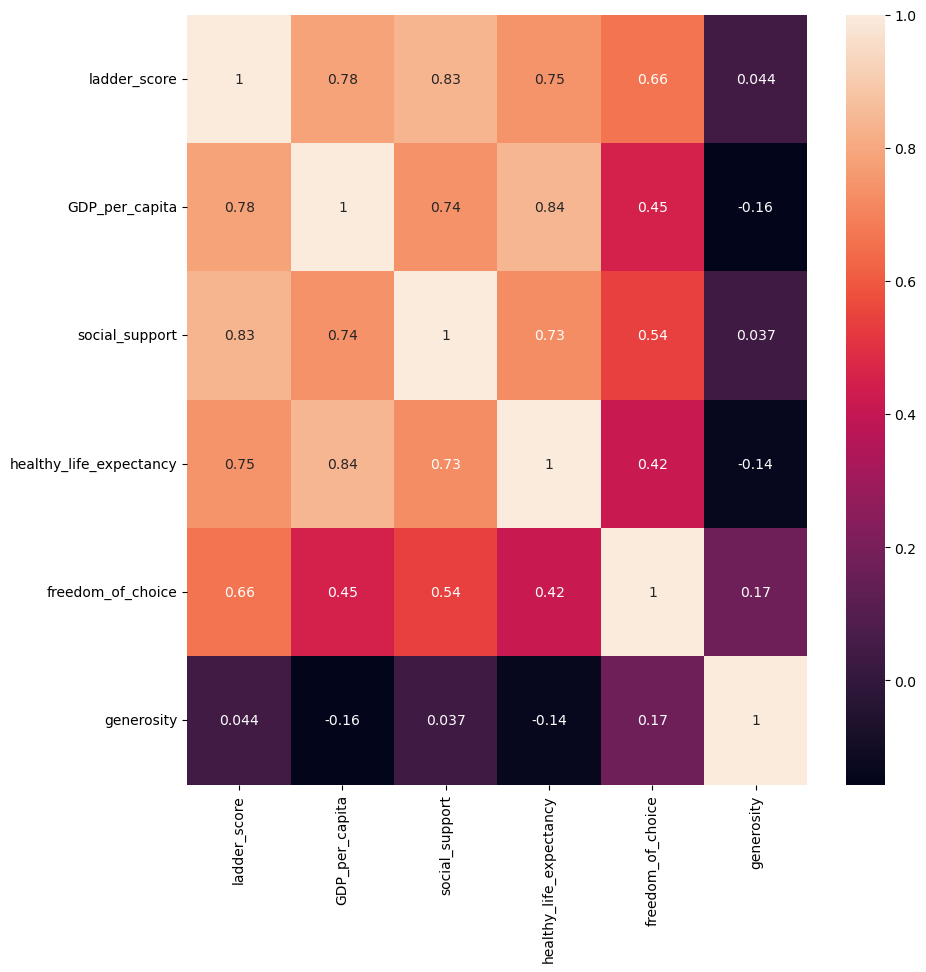

In [14]:
#correlation heatmap of numerial data
plt.figure(figsize=(10,10))
sns.heatmap(
    happy_df[numerical_col].corr(),
    annot=True,
    )

In [15]:
# happy_df.replace()

In [16]:
col_df = costofliving_df.copy()

In [17]:
col_df.rename(columns={
    'Country': 'country', 
    'Cost of Living Index' : 'costofliving_index', 
    'Rent Index': 'rent_index',
    'Cost of Living Plus Rent Index' : 'col_plus_rent_index', 
    'Groceries Index' : 'groceries_index',
    'Restaurant Price Index' : 'restaurant_price_index', 
    'Local Purchasing Power Index' : 'local_purchase_power_index'           
}, inplace=True)

In [18]:
col_df.columns

Index(['country', 'costofliving_index', 'rent_index', 'col_plus_rent_index',
       'groceries_index', 'restaurant_price_index',
       'local_purchase_power_index'],
      dtype='object')

In [19]:
col_df
# happy_df

,country,costofliving_index,rent_index,col_plus_rent_index,groceries_index,restaurant_price_index,local_purchase_power_index
0,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,Barbados,76.6,19.0,48.9,80.8,69.4,43.5
...,...,...,...,...,...,...,...
116,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1
117,India,21.2,5.6,13.7,23.8,15.1,82.6
118,Egypt,21.0,3.7,12.7,21.2,16.2,20.0
119,Libya,20.4,4.3,12.7,22.2,15.2,42.0


In [20]:
col_df['country'] = col_df['country'].str.lower()
happy_df['country'] = happy_df['country'].str.lower()

/var/folders/_0/kyp2mnk90qn2fz6spd6zpns40000gn/T/ipykernel_16802/1074911790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happy_df['country'] = happy_df['country'].str.lower()


In [21]:
col_df.replace(
    ['czech republic', 'hong kong (china)','kosovo (disputed territory)'], 
    ['czech','hong kong', 'kosovo'], 
    inplace=True)

happy_df.replace(
    ['czechia', 'hong kong s.a.r. of china', 'state of palestine', 'taiwan province of china', 'turkiye'], 
    ['czech', 'hong kong', 'palestine', 'taiwan', 'turkey'],
    inplace = True)

/var/folders/_0/kyp2mnk90qn2fz6spd6zpns40000gn/T/ipykernel_16802/2719669548.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happy_df.replace(


In [22]:
merged_df = happy_df.merge(col_df, how='outer', on='country')

In [23]:
merged_df.isnull().sum()

country                        0
ladder_score                  13
GDP_per_capita                13
social_support                13
healthy_life_expectancy       14
freedom_of_choice             13
generosity                    13
costofliving_index            29
rent_index                    29
col_plus_rent_index           29
groceries_index               29
restaurant_price_index        29
local_purchase_power_index    29
dtype: int64

In [24]:
merged_df

,country,ladder_score,GDP_per_capita,social_support,healthy_life_expectancy,freedom_of_choice,generosity,costofliving_index,rent_index,col_plus_rent_index,groceries_index,restaurant_price_index,local_purchase_power_index
0,finland,7.804,10.792,0.969,71.150,0.961,-0.019,63.2,19.7,42.4,63.0,63.6,118.0
1,denmark,7.586,10.962,0.954,71.250,0.934,0.134,72.3,26.4,50.2,64.8,81.3,127.2
2,iceland,7.530,10.896,0.983,72.050,0.936,0.211,83.0,39.2,62.0,88.4,86.8,120.3
3,israel,7.473,10.639,0.943,72.697,0.809,-0.023,62.7,27.1,45.6,59.6,68.0,99.4
4,netherlands,7.403,10.942,0.930,71.550,0.887,0.213,63.1,33.5,48.9,59.9,61.2,124.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,fiji,NaN,NaN,NaN,NaN,NaN,NaN,35.4,15.3,25.8,43.7,28.4,68.0
146,azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,31.2,8.7,20.4,29.0,31.8,37.2
147,belarus,NaN,NaN,NaN,NaN,NaN,NaN,26.4,8.3,17.7,25.4,24.9,51.8
148,syria,NaN,NaN,NaN,NaN,NaN,NaN,24.0,3.7,14.2,24.5,15.3,5.5


In [25]:
new_merged_df = merged_df.dropna(axis=0)

In [26]:
merged_df.describe()

,ladder_score,GDP_per_capita,social_support,healthy_life_expectancy,freedom_of_choice,generosity,costofliving_index,rent_index,col_plus_rent_index,groceries_index,restaurant_price_index,local_purchase_power_index
count,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,5.539796,9.449796,0.799073,64.967632,0.787394,0.022431,43.555372,16.052893,30.357851,44.228926,36.471074,65.094215
std,1.139929,1.207302,0.129222,5.750390,0.112371,0.141707,16.147574,11.412267,13.263721,17.055109,18.258110,39.569094
min,1.859000,5.527000,0.341000,51.530000,0.382000,-0.254000,18.800000,2.400000,11.100000,17.500000,12.800000,2.300000
25%,4.724000,8.591000,0.722000,60.648500,0.724000,-0.074000,30.200000,8.500000,19.800000,31.600000,21.600000,34.800000
50%,5.684000,9.567000,0.827000,65.837500,0.801000,0.001000,39.500000,12.400000,27.000000,40.500000,33.100000,50.600000
75%,6.334000,10.540000,0.896000,69.412500,0.874000,0.117000,52.800000,20.100000,37.000000,53.700000,47.200000,99.400000
max,7.804000,11.660000,0.983000,77.280000,0.961000,0.531000,101.100000,67.200000,74.900000,109.100000,97.000000,182.500000


In [27]:
new_merged_df.describe()

,ladder_score,GDP_per_capita,social_support,healthy_life_expectancy,freedom_of_choice,generosity,costofliving_index,rent_index,col_plus_rent_index,groceries_index,restaurant_price_index,local_purchase_power_index
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,5.828364,9.844084,0.837664,66.910561,0.808972,0.011477,43.282243,16.103738,30.241121,44.141121,36.239252,64.630841
std,1.029240,1.009977,0.098971,4.625230,0.103740,0.139840,15.808660,11.584358,13.228407,16.841161,18.157689,37.849180
min,2.392000,5.527000,0.530000,54.050000,0.474000,-0.254000,18.800000,2.400000,11.100000,17.500000,12.800000,10.500000
25%,5.276000,9.293500,0.797000,64.748500,0.761500,-0.084000,30.200000,8.500000,19.700000,31.850000,21.100000,34.550000
50%,5.968000,9.952000,0.872000,67.100000,0.819000,-0.009000,39.100000,12.400000,27.000000,39.800000,33.100000,50.600000
75%,6.514500,10.636500,0.912000,70.624500,0.886500,0.118000,53.350000,20.100000,36.300000,52.900000,47.700000,97.250000
max,7.804000,11.660000,0.983000,77.280000,0.961000,0.531000,101.100000,67.200000,74.900000,109.100000,97.000000,182.500000


In [28]:
null_merged_df = merged_df[merged_df.isnull().any(axis=1)][['country','ladder_score']]
null_merged_df.to_csv('to_clean2.csv', index=False)

In [29]:
happy_df

,country,ladder_score,GDP_per_capita,social_support,healthy_life_expectancy,freedom_of_choice,generosity
0,finland,7.804,10.792,0.969,71.150,0.961,-0.019
1,denmark,7.586,10.962,0.954,71.250,0.934,0.134
2,iceland,7.530,10.896,0.983,72.050,0.936,0.211
3,israel,7.473,10.639,0.943,72.697,0.809,-0.023
4,netherlands,7.403,10.942,0.930,71.550,0.887,0.213
...,...,...,...,...,...,...,...
132,congo (kinshasa),3.207,7.007,0.652,55.375,0.664,0.086
133,zimbabwe,3.204,7.641,0.690,54.050,0.654,-0.046
134,sierra leone,3.138,7.394,0.555,54.900,0.660,0.105
135,lebanon,2.392,9.478,0.530,66.149,0.474,-0.141


In [30]:
costofliving_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         121 non-null    object 
 1   Cost of Living Index            121 non-null    float64
 2   Rent Index                      121 non-null    float64
 3   Cost of Living Plus Rent Index  121 non-null    float64
 4   Groceries Index                 121 non-null    float64
 5   Restaurant Price Index          121 non-null    float64
 6   Local Purchasing Power Index    121 non-null    float64
dtypes: float64(6), object(1)
memory usage: 6.7+ KB


In [42]:
new_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 0 to 135
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     107 non-null    object 
 1   ladder_score                107 non-null    float64
 2   GDP_per_capita              107 non-null    float64
 3   social_support              107 non-null    float64
 4   healthy_life_expectancy     107 non-null    float64
 5   freedom_of_choice           107 non-null    float64
 6   generosity                  107 non-null    float64
 7   costofliving_index          107 non-null    float64
 8   rent_index                  107 non-null    float64
 9   col_plus_rent_index         107 non-null    float64
 10  groceries_index             107 non-null    float64
 11  restaurant_price_index      107 non-null    float64
 12  local_purchase_power_index  107 non-null    float64
dtypes: float64(12), object(1)
memory usage: 

## Visualization

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
numerical_cols = new_merged_df.select_dtypes(include=['number']).columns.tolist()

<Axes: >

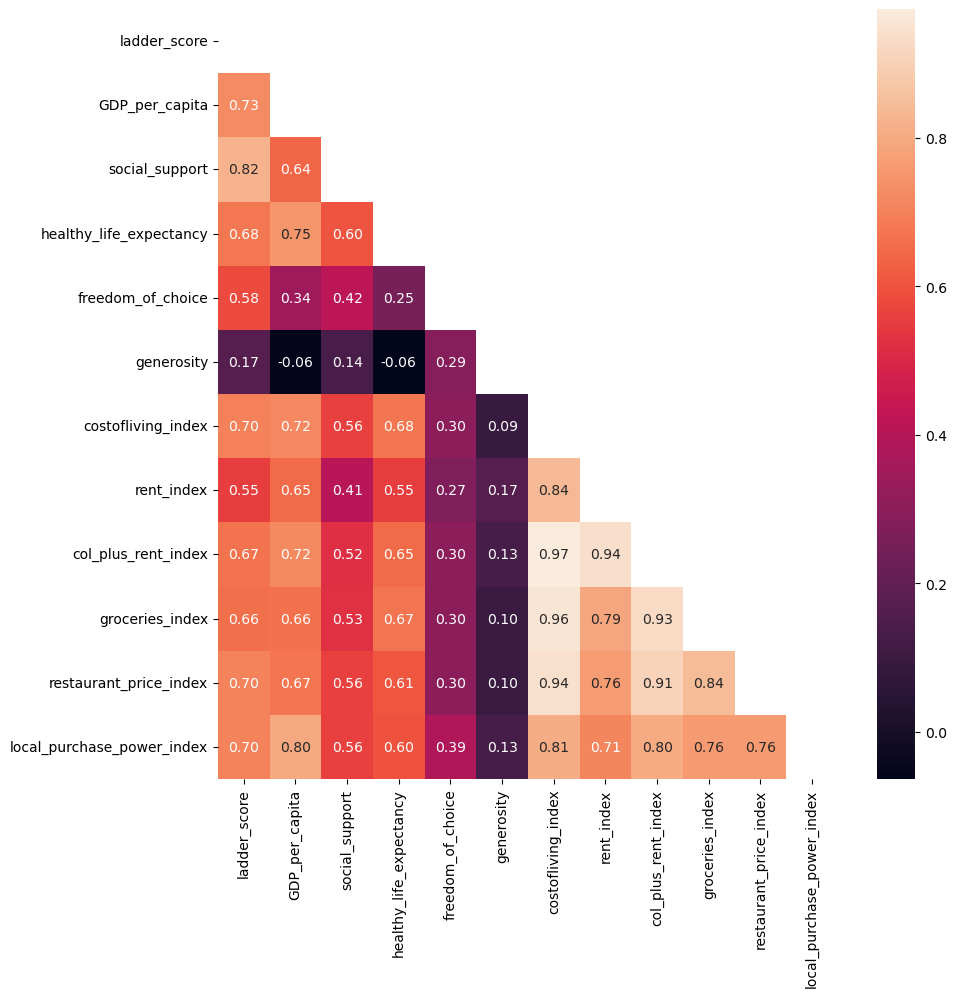

In [33]:
#correlation heatmap of numerial data
plt.figure(figsize=(10,10))
sns.heatmap(
    new_merged_df[numerical_cols].corr(),
    annot=True,
    annot_kws={'size':10},
    fmt=".2f",
    mask=np.triu(np.ones_like(new_merged_df[numerical_cols].corr(), dtype=bool))

    
)

## Train, Test and split before scaling final dataset

In [34]:
#pip install 

In [58]:
# Splitting training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_merged_df.drop(columns=['ladder_score', 'country']), new_merged_df['ladder_score'], test_size=0.2, random_state=42)

In [59]:
y_train

70     5.633
26     6.535
22     6.609
31     6.436
58     5.902
       ...  
74     5.526
14     6.894
107    4.555
53     6.014
126    4.019
Name: ladder_score, Length: 85, dtype: float64

In [60]:
df_columns = new_merged_df.columns.tolist()

In [61]:
df_columns.remove('country')
df_columns.remove('ladder_score')

In [62]:
df_columns

['GDP_per_capita',
 'social_support',
 'healthy_life_expectancy',
 'freedom_of_choice',
 'generosity',
 'costofliving_index',
 'rent_index',
 'col_plus_rent_index',
 'groceries_index',
 'restaurant_price_index',
 'local_purchase_power_index']

## Scaling and Finihsing up

In [63]:
# Scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.183139,0.447307,0.142539,-0.644918,1.600013,-0.494349,-0.861494,-0.665026,-0.540943,-0.731573,-0.176577
1,0.964238,0.486575,0.669363,-0.076348,-1.066519,0.160103,-0.235545,0.004211,1.008065,-0.698233,0.836758
2,0.143295,0.368772,0.760000,0.815719,-0.596891,0.615653,0.091038,0.424430,0.766033,0.418639,-0.460417
3,0.714555,0.957790,1.292488,-0.292012,-0.565052,0.294843,0.653485,0.455557,0.154901,0.474205,0.757177
4,0.148153,0.525843,-0.633535,0.011879,-0.262580,-0.359609,-0.516769,-0.439353,-0.165792,-0.503753,-0.539998
...,...,...,...,...,...,...,...,...,...,...,...
80,-0.391047,-0.357684,0.726011,-0.174377,-0.986921,-0.815159,-0.553055,-0.742844,-0.722467,-0.792695,-0.762826
81,1.208092,0.830169,-0.180353,-0.115559,1.050787,1.776985,2.358971,2.089742,1.909636,1.757775,2.088838
82,-1.228506,-2.291627,-2.114760,-0.448859,0.023973,-1.533774,-1.169933,-1.450991,-1.569581,-1.259448,-0.914030
83,-0.832122,0.398222,-0.304752,1.237246,1.791048,-1.046142,-0.407908,-0.828444,-0.910042,-0.942723,-0.643454


In [68]:
y_train

70     5.633
26     6.535
22     6.609
31     6.436
58     5.902
       ...  
74     5.526
14     6.894
107    4.555
53     6.014
126    4.019
Name: ladder_score, Length: 85, dtype: float64

In [69]:
# Saving processed data to csv
pd.DataFrame(X_train_scaled, columns=df_columns).to_csv('../data/processed/X_train_scaled.csv', index=False)
pd.DataFrame(X_test_scaled, columns=df_columns).to_csv('../data/processed/X_test_scaled.csv', index=False)
pd.DataFrame(y_train, columns=['ladder_score']).to_csv('../data/processed/y_train.csv', index=False)
pd.DataFrame(y_test, columns=['ladder_score']).to_csv('../data/processed/y_test.csv', index=False)

## Model Selection